In [1]:
import nltk

In [2]:
TEXT_DIR = '../output/'

In [3]:
def buildCorpus():
    from nltk.corpus import PlaintextCorpusReader
    return PlaintextCorpusReader(TEXT_DIR, '.*')

In [4]:
corpus = buildCorpus()
fileids = corpus.fileids()
fileids = fileids[0:10]
for fileid in fileids:
    num_chars = len(corpus.raw(fileid))
    num_words = len(corpus.words(fileid))
    num_sents = len(corpus.sents(fileid))
    num_vocab = len(set([w.lower() for w in corpus.words(fileid)]))
    print(str(round(num_chars/num_words))+", "+str(round(num_words/num_sents))+", "+str(round(num_words/num_vocab))+" : "+fileid)


5, 12, 2 : aa100180.txt
5, 14, 2 : aa100355.txt
6, 14, 2 : aa100367.txt
5, 15, 5 : aa10253.txt
4, 12, 2 : aa102542.txt
5, 13, 3 : aa102611.txt
5, 13, 2 : aa102618.txt
6, 7, 1 : aa103080.txt
5, 15, 2 : aa103823.txt
6, 18, 2 : aa104339spec.txt


In [5]:
print(corpus.sents())

[['polyhydramnios'], ['topic', 'overview'], ...]


_Frequenc Distribution_ - counter object - mapping of a word to an integer (its count)

If we count the number of keys, those are unique words - vocabulary
Word count = sum of the values 
Lexical diversity - average number of times a word occurs X times

In [6]:
counts  = nltk.FreqDist(corpus.words())
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

In [7]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 88058 types and 21948380 tokens for a lexical diversity of 249.249


In [43]:
print(counts.most_common(40))

[('.', 1076636), (',', 966122), ('the', 642264), ('of', 502463), ('and', 413520), ('to', 392346), ('a', 388693), ('*', 325308), ('in', 319793), ('or', 305083), ('-', 297601), ('your', 260852), ('you', 250547), ('with', 224854), ('is', 208724), ('(', 191190), ('for', 180748), ('that', 145105), ('may', 140575), ('not', 122292), ('be', 120790), ('if', 117955), ('have', 114100), ('are', 108621), ('can', 107686), (':', 104457), ('as', 101063), ('this', 95346), ('it', 94375), ('cancer', 90366), ('doctor', 87521), ('chemotherapy', 84529), ('vitamin', 79657), (')', 78256), ('by', 72983), ("'", 69481), ('on', 68294), ('people', 67641), ('an', 67549), ('taking', 59652)]


In [44]:
print(counts.hapaxes()[0:1000])

['siamese', 'trager', 'dancelike', 'mentastics', 'rolfing', 'critics', 'cnme', 'accredit', 'ckd', 'goong', 'headstand', 'vacuumed', 'alh', 'bradyarrhythmias', 'allspice', 'refillable', 'curdling', 'crosscut', 'adust', 'snip', 'hevea', 'brasiliensis', 'nonlatex', 'intelligently', 'grandchild', 'deactivated', 'unsaid', 'forgets', 'storybook', 'anca', 'hypoperfusion', 'governs', 'greed', 'dosha', 'reclosure', 'achondroplastic', 'esis', 'interspinous', 'unwillingly', 'sulfinpyrazone', 'probalan', 'instrumented', 'buffers', 'dieted', 'cheapest', 'achievers', 'heliox', 'intracanal', 'dams', 'binocular', 'crescents', 'glares', 'inaction', 'thanked', 'exchanging', 'devastated', 'insincere', 'unexpressed', 'clergyperson', 'reminiscence', 'genuinely', 'snowstorm', 'snowed', 'tally', '...,"', 'greeting', 'frightens', 'unfairness', 'rmr', 'disfigure', 'accountants', 'annuity', 'byes', 'reminisce', 'embalming', 'graveside', 'limousine', 'monuments', 'revising', 'massaged', 'cubital', 'pronator', 'f

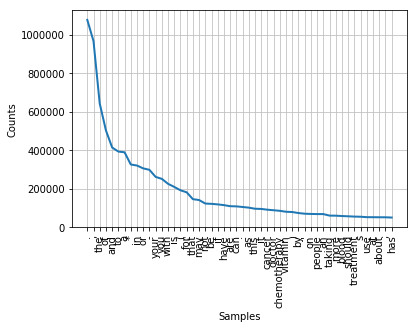

In [8]:
counts.plot(50, cumulative=False)

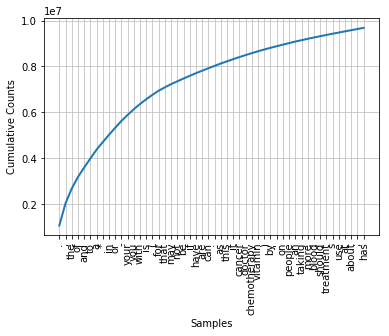

In [46]:
# By setting cumulative to True, we can visualize the cumulative counts of the _n_ most common words.
counts.plot(50, cumulative=True)


In [47]:
from gensim.models import Word2Vec
hwgensim = Word2Vec(corpus.sents())

In [48]:
hwgensim.most_similar('cancer', topn=20)

[('carcinoma', 0.6628593802452087),
 ('melanoma', 0.5866332054138184),
 ('cancers', 0.585310161113739),
 ('carcinogenesis', 0.5620290637016296),
 ('adenocarcinoma', 0.5331070423126221),
 ('retinoblastoma', 0.48935186862945557),
 ('neuroblastoma', 0.48847079277038574),
 ('rhabdomyosarcoma', 0.4765234589576721),
 ('reconstruction', 0.47487884759902954),
 ('seminoma', 0.4725579023361206),
 ('carcinomas', 0.4713461995124817),
 ('crc', 0.4695562720298767),
 ('tumorigenesis', 0.461806058883667),
 ('rcc', 0.45305436849594116),
 ('adenocarcinomas', 0.452506422996521),
 ('malignancy', 0.4522184133529663),
 ('neoplasia', 0.44966548681259155),
 ('scc', 0.4342446029186249),
 ('bcc', 0.4334392845630646),
 ('hcc', 0.42269033193588257)]

In [49]:
hwgensim.most_similar('blood', topn=20)

[('cytometry', 0.5638747215270996),
 ('iop', 0.5526982545852661),
 ('atmospheric', 0.5415970683097839),
 ('peak', 0.5229536294937134),
 ('platelet', 0.522757351398468),
 ('intraocular', 0.4816077649593353),
 ('cytometric', 0.47526270151138306),
 ('serum', 0.4727635383605957),
 ('inspiratory', 0.4717923402786255),
 ('cholesterol', 0.460968017578125),
 ('expiratory', 0.4605550765991211),
 ('alcohols', 0.45309218764305115),
 ('bloodstream', 0.452660471200943),
 ('equalizes', 0.4464339017868042),
 ('saliva', 0.4378783106803894),
 ('airway', 0.4305822253227234),
 ('hdl', 0.42699217796325684),
 ('air', 0.42413389682769775),
 ('barotrauma', 0.4094390273094177),
 ('urinary', 0.4082310199737549)]

In [50]:
hwgensim.most_similar('hope', topn=20)

[('resource', 0.7558938264846802),
 ('provides', 0.6462764739990234),
 ('we', 0.6300075054168701),
 ('struggle', 0.47041359543800354),
 ('informed', 0.4062565565109253),
 ('mediator', 0.4050474762916565),
 ('shepherd', 0.3973468542098999),
 ('trust', 0.39186370372772217),
 ('developers', 0.3879660367965698),
 ('finding', 0.38378357887268066),
 ('enker', 0.38300657272338867),
 ('issue', 0.3794286251068115),
 ('deal', 0.37701940536499023),
 ('culturally', 0.3763284981250763),
 ('hypothesis', 0.37335285544395447),
 ('approach', 0.3686356842517853),
 ('nutritionist', 0.36828768253326416),
 ('claim', 0.36777618527412415),
 ('experiment', 0.36184263229370117),
 ('circumstance', 0.3609424829483032)]

In [51]:
hwgensim.similarity('cancer', 'tumor')

0.37797940534387175

In [52]:
hwgensim.save("../models/hwgensimv1.bin")